<div dir="rtl">


<a class="anchor" id="bcImp"></a>
## <span style=''>فهرست مطالب</span>
* [<b>خلاصه</b>](#abstract)
* [<b>وارد کردن وابستگی‌ها و بارگذاری مجموعه داده</b>](#importData)
* [<b>مرور داده</b>](#dOverview)
     * [ابعاد داده‌های آموزش و آزمایش](#dTrainTest)
     * [تصویرسازی داده با استفاده از TSNE](#visualizeTSNE)
     * [تقسیم داده به مجموعه آموزش و اعتبارسنجی](#splitData)
     * [ابعاد داده‌های آموزش و اعتبارسنجی](#dTrainVal)
     * [تبدیل داده‌های آموزش، آزمایش و اعتبارسنجی به آرایه](#reTrainTestVal)
     * [ابعاد داده‌های آموزش، آزمایش و اعتبارسنجی پس از تغییر شکل](#dreshape)
     * [<b>خلاصه</b>](#summaryData)
* [<b>بررسی داده</b>](#exploreData)
     * [تصویرسازی چگونگی نوشتن اعداد](#visualizeData)
     * [تغییر شکل داده‌های آموزش، آزمایش و اعتبارسنجی](#reshapeData)
     * [نرمال‌سازی داده‌های آموزش، آزمایش و اعتبارسنجی](#normalizeData)
     * [<b>خلاصه</b>](#summaryExploreData)
* [<b>ساخت مدل CNN برای دسته‌بندی اعداد دست‌نویس</b>](#modeling)
<a class="anchor" id="modelAnchor"></a>
     * [خلاصه مدل آموزش](#modelSummary)
     * [تصویرسازی مدل](#modelplot)
     * [کامپایل مدل با استفاده از keras.optimizers.Adam](#compileModel)
     * [آموزش مدل](#trainModel)
     * [<b>خلاصه</b>](#modelBuildSummary)
* [<b>ارزیابی مدل</b>](#modelEvaluation)
<a class="anchor" id="bcImp1"></a>
     * [نمودار تابع هزینه برای مجموعه آموزش و اعتبارسنجی](#lossPlot)
     * [نمودار دقت برای مجموعه آموزش و اعتبارسنجی](#accuracyPlot)
     * [<b>ارزیابی دقت مدل</b>](#accuracyEvaluation)
         * [عملکرد مجموعه داده آموزش](#perfTrain)
         * [عملکرد مجموعه داده اعتبارسنجی](#perfValidation)
         * [ذخیره و بارگذاری مدل](#saveModel)
         * [تصویرسازی داده‌های پیش‌بینی شده اعتبارسنجی و چگونگی نوشتن اعداد](#visualizevalidation)
         * [ماتریس اشتباه مجموعه داده اعتبارسنجی](#cmValidation)
     * [<b>خلاصه</b>](#modelEvaluationSummary)
* [<b>پیش‌بینی مدل بر روی مجموعه داده غیرمشاهده شده (داده آزمایش)</b>](#modelprediction)
     * [تصویرسازی داده‌های پیش‌بینی شده از مجموعه داده آزمایش و چگونگی نوشتن اعداد](#visualizePredict)
* [<b>تسلیم</b>](#submission)


<div dir="rtl">وارد کردن وابستگی‌ها و بارگذاری مجموعه داده

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd #
import math
import datetime
import platform


In [4]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)

Python version: 3.11.5
Tensorflow version: 2.15.0


In [5]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

<div dir="rtl">

## <span> 3 | مرور داده </span><a class="anchor" id="dOverview"></a>
<hr>



مجموعه داده MNIST شامل <code>42,000</code> تصویر آموزشی از اعداد دست نوشته شده از صفر تا نه (10 کلاس مختلف) و <code>28,000</code> تصویر برای آزمایش بدون برچسب شناسه (برای ارسال) است. این تصاویر مقدار پیکسل های خاکستری را دارند و به صورت یک ماتریس <code>28×28</code> نمایش داده می شوند.

### 3.1 | ابعاد داده های آموزش و آزمایش <a class="anchor" id="dTrainTest"></a>


In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [8]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [10]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

<div dir="rtl">

### <span style=''>3.2 | تصویرسازی داده‌ها با استفاده از TSNE </span><a class="anchor" id="visualizeTSNE"></a>
<hr>



<b>TSNE</b> - مخفف t-Distributed Stochastic Neighbor embedding. این الگوریتم کاهش ابعاد است که برای حفظ ساختار محلی در مجموعه داده‌های بعد بالا طراحی شده است، اما به ساختار جهانی کمتر اهمیت می‌دهد. در اینجا، ما از آن برای تبدیل ابعاد تصاویر از 784 بعدی به دو بعد استفاده می‌کنیم. این کار نمودار کشیدن را آسان‌تر می‌کند. مقیاس رنگی مربوط به برچسب اصلی MNIST است و می‌توان دید که جداکنندگی برچسب‌ها آشکار است.

In [11]:
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

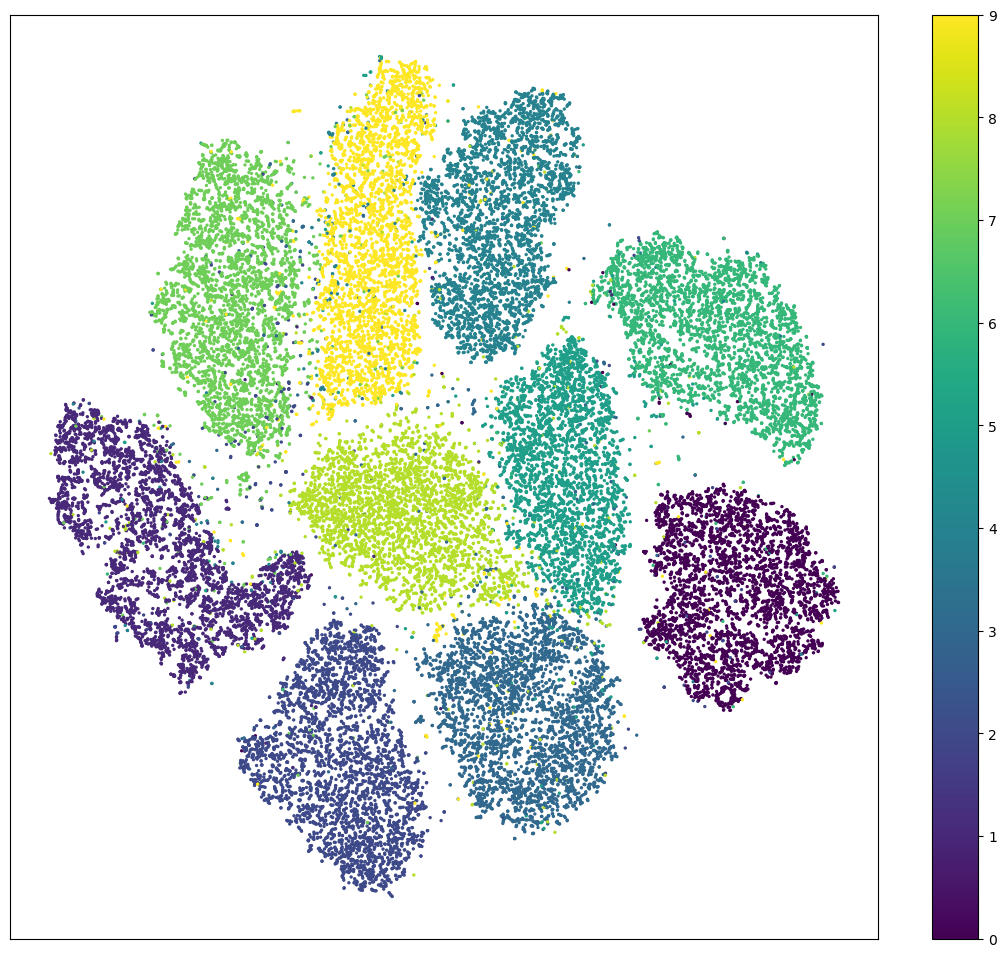

In [12]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar()

<div dir="rtl">

### 3.3 | تقسیم داده به دو مجموعه آموزشی و اعتبارسنجی<a class="anchor" id="splitData"></a>


ما دیتاست ما (X) را به دو بخش تقسیم می‌کنیم.
<ol>
    <li> داده‌های آموزشی (<b>80%</b>) برای آموزش مدل‌های ما استفاده می‌شود</li>
    <li> داده‌های اعتبارسنجی (<b>20%</b>) برای ارزیابی مدل‌های ما استفاده می‌شود</li>
</ol>

متد <code>train_test_split()</code> به ما داده‌های آموزشی و برچسب‌های آنها و همچنین داده‌های اعتبارسنجی و برچسب‌های آنها را باز می‌گرداند.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

<div dir="rtl">

### 3.4 | ابعاد داده‌های آموزش و اعتبارسنجی<a class="anchor" id="dTrainVal"></a>

In [14]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


<div dir="rtl">

### 3.5 | تبدیل داده‌های آموزش، آزمایش و اعتبارسنجی به آرایه<a class="anchor" id="reTrainTestVal"></a>

In [15]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

<div dir="rtl">

### 3.6 | ابعاد داده‌های آموزش، آزمون و اعتبارسنجی پس از تغییر شکل<a class="anchor" id="dreshape">

In [16]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [17]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


<div dir="rtl">


## <span style=''> 4 | بررسی داده‌ها </span><a class="anchor" id="exploreData">

در اینجا نمایش داده شده است که هر تصویر در مجموعه داده چگونه است. این یک ماتریس <code>28x28</code> از اعداد صحیح (از 0 تا 255) است و هر عدد صحیح نمایانگر رنگ یک پیکسل است.

In [18]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


<div dir="rtl">

### ۴.۱ | تصویرسازی چگونه اعداد نوشته شده‌اند <a class="anchor" id="visualizeData"></a>

این ماتریس اعداد ممکن است به شکل زیر نمایش داده شود:

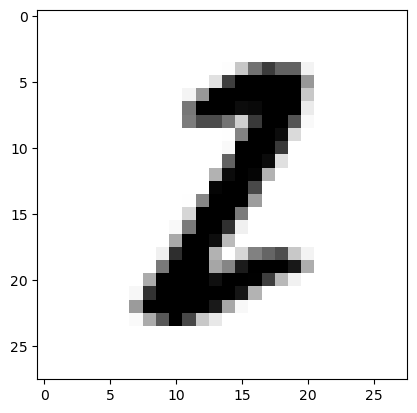

In [19]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()


<div dir="rtl">
سابقه‌ی اولین داده‌های آموزشی ما نمایانگر عدد ۲ است. <br>
بیایید چند نمونه‌ی دیگر از داده‌های آموزشی چاپ کنیم تا احساس کنیم که چگونه اعداد نوشته شده‌اند.

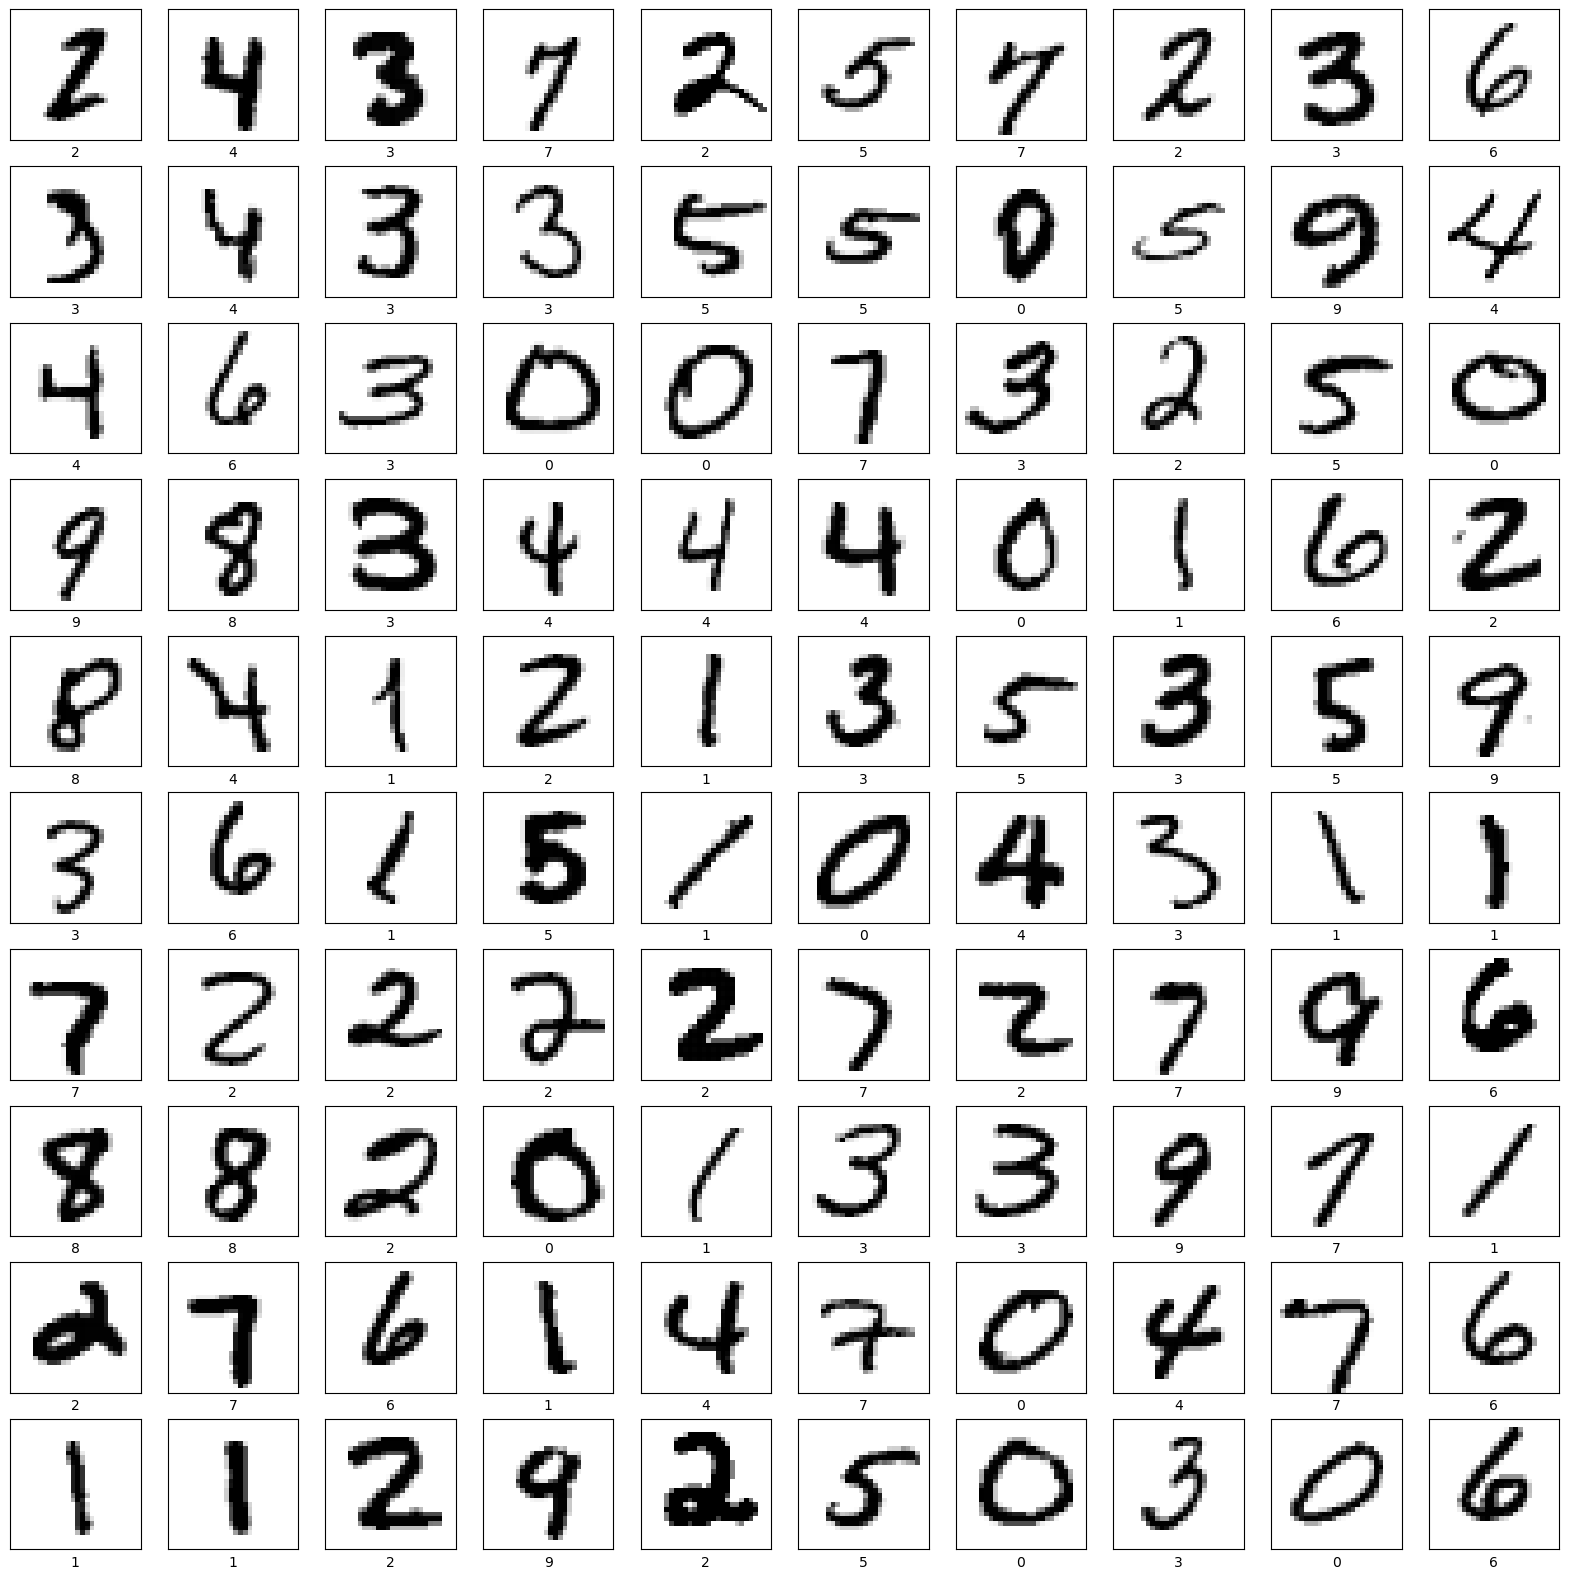

In [20]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

<div dir="rtl">

### ۴.۲ | تغییر شکل دادن داده‌های آموزش، آزمون و اعتبارسنجی <a class ="anchor" id = "reshapeData"></a>


برای استفاده از لایه‌های تبدیل تصویر نیاز به تغییر شکل داده‌های ما و اضافه کردن یک کانال رنگ به آن داریم. همانطور که متوجه شده‌اید، در حال حاضر هر رقم شکلی به ابعاد (۲۸، ۲۸) دارد که به معنای آن است که این یک ماتریس ۲۸ در ۲۸ از ارزش‌های رنگی از ۰ تا ۲۵۵ است. ما باید آن را به شکل (۲۸، ۲۸، ۱) تغییر شکل دهیم تا هر پیکسل به طور احتمالی بتواند چندین کانال (مثل قرمز، سبز و آبی) داشته باشد.

In [21]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [22]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


<div dir="rtl">

### 4.3 | نرمال‌سازی داده‌های آموزش، آزمون و اعتبارسنجی <a class="anchor" id="normalizeData"></a>

در اینجا ما فقط سعی داریم مقادیر را از دامنه [0...255] به [0...1] نرمال‌سازی کنیم.

In [23]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [24]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

<div dir="rtl">

## <span style=''> 5 | ساخت مدل CNN برای دسته‌بندی اعداد دست‌نوشته </span><a class="anchor" id="modeling"></a>
<hr>


یک مدل شبکه عصبی مکرر معمولاً شامل لایه‌های کانوولوشن و لایه‌های پولینگ است.

ما از مدل Sequential Keras استفاده می‌کنیم که دو جفت از لایه‌های Convolution2D و MaxPooling2D دارد. لایه MaxPooling به عنوان نوعی از کاهش ابعاد عمل می‌کند و از مقادیر بزرگتر در یک ناحیه استفاده می‌کند به جای میانگین‌گیری.

پس از آن، از لایه Flatten استفاده می‌کنیم تا پارامترهای چندبعدی را به یک بردار تبدیل کنیم.

آخرین لایه یک لایه Dense با 10 خروجی Softmax خواهد بود. خروجی نمایش شبکه را نشان می‌دهد. خروجی صفرم احتمالی را نشان می‌دهد که عدد ورودی صفر باشد، خروجی اول احتمالی را نشان می‌دهد که عدد ورودی یک باشد و به همین ترتیب...

In [25]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

<div dir="rtl">

### ۵.۱ | خلاصه‌ی مدل آموزشی <a class="anchor" id="modelSummary"></a>


تا اینجا خلاصه‌ی مدل ما به شرح زیر است.

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

<div dir="rtl">

### ۵.۲ | تصویرسازی مدل <a class ="anchor" id = "modelplot"></a>
برای نمایش مدل، باید graphviz نصب شده باشد.

یک خلاصه مدل که لایه‌های مختلفی که در مدل تعریف شده است را توصیف می‌کند.

<div dir="rtl">


### 5.3 | کامپایل مدل با استفاده از keras.optimizers.Adam <a class ="anchor" id = "compileModel"></a>

In [28]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

<div dir="rtl">


### 5.4 | آموزش مدل <a class ="anchor" id ="trainModel"></a>

In [29]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10


1050/1050 [==============================] - 10s 8ms/step - loss: 0.2958 - accuracy: 0.9085 - val_loss: 0.0956 - val_accuracy: 0.9701
Epoch 2/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0880 - accuracy: 0.9731 - val_loss: 0.0576 - val_accuracy: 0.9832
Epoch 3/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0541 - val_accuracy: 0.9837
Epoch 4/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0505 - accuracy: 0.9834 - val_loss: 0.0587 - val_accuracy: 0.9808
Epoch 5/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0419 - accuracy: 0.9861 - val_loss: 0.0556 - val_accuracy: 0.9845
Epoch 6/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.0480 - val_accuracy: 0.9861
Epoch 7/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0421 - val_accu

<div dir="rtl">


## <span > 6 | ارزیابی مدل </span><a class ="anchor" id ="modelEvaluation"></a>
<hr>


### 6.1 | نمودار تغییر تابع خطا برای آموزش و اعتبارسنجی<a class="anchor" id ="lossPlot"><a/>
    
بیایید ببینیم که تابع خطا در طول آموزش چگونه تغییر می‌کرد. انتظار داریم که با هر دور آموزش، کوچکتر و کوچکتر شود.

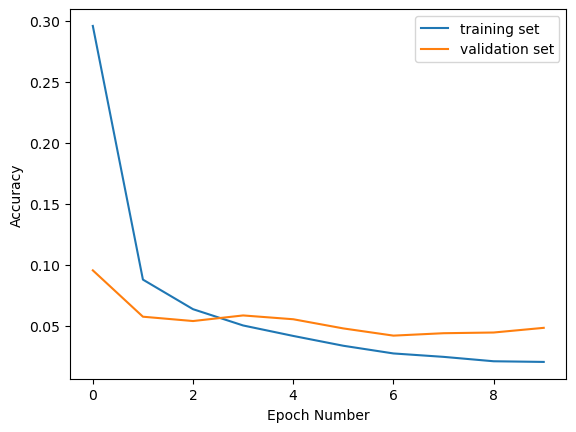

In [30]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

<div dir="rtl">

### 6.2 | نمودار منحنی دقت برای آموزش و اعتبارسنجی<a class="anchor" id ="accuracyPlot"><a/>


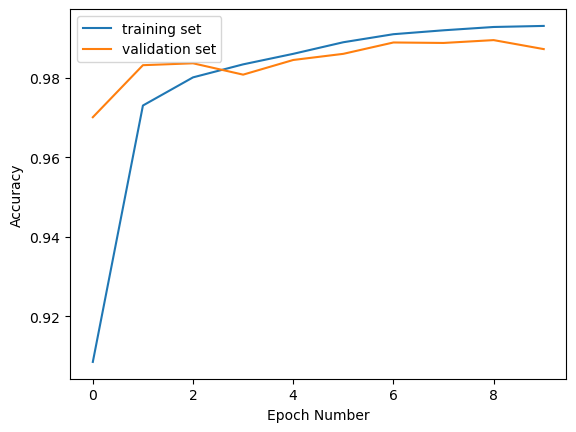

In [31]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

<div dir="rtl">


### 6.3 | ارزیابی دقت مدل<a class="anchor" id="accuracyEvaluation"></a>

ما باید دقت مدل خود را در مجموعه آموزش و مجموعه ارزیابی مقایسه کنیم. ما انتظار داریم مدل ما در هر دو مجموعه به طرز مشابهی عمل کند. اگر عملکرد در مجموعه ارزیابی نسبت به مجموعه آموزش ضعیف باشد، این به ما نشانگری می‌دهد که مدل به طور زیادی برازش شده است و ما با مشکل "تنوع بالا" روبه‌رو هستیم.

<div dir="rtl">


#### 6.3.1 | عملکرد مجموعه داده آموزشی <a class="anchor" id="perfTrain"></a>

In [32]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

1050/1050 [==============================] - 3s 3ms/step - loss: 0.0094 - accuracy: 0.9968


In [33]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.009433146566152573
Train accuracy:  0.9968452453613281


<div dir="rtl">


### 6.3.2 | عملکرد مجموعه داده اعتبارسنجی <a class="anchor" id="perfValidation"></a>

In [34]:
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

263/263 [==============================] - 1s 4ms/step - loss: 0.0485 - accuracy: 0.9873


In [35]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04851541295647621
Validation accuracy:  0.9872618913650513


<div dir="rtl">با یک امتیاز تایید نزدیک به ۹۹٪، ما ادامه می‌دهیم و از این مدل برای پیش‌بینی مجموعه آزمایشی استفاده می‌کنیم.

<div dir="rtl">

### 6.3.3 | ذخیره و بارگیری مدل<a class="anchor" id="saveModel"></a>

ما کل مدل را در یک فایل HDF5 ذخیره خواهیم کرد. پسوند .h5 فایل نشان می‌دهد که مدل باید به صورت یک فایل HDF5 در فرمت Keras ذخیره شود.

In [36]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

c:\Users\Vatche\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
loaded_model = tf.keras.models.load_model(model_name)

<div dir="rtl">

### 6.3.4 | نمایش داده‌های پیش‌بینی شده اعتبارسنجی درباره نحوه نوشتن اعداد <a class="anchor" id="visualizevalidation"></a>

برای استفاده از مدلی که به تازگی برای تشخیص اعداد آموزش دادیم، باید متد predict() را فراخوانی کنیم.

In [38]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 1s 4ms/step


In [39]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


<div dir="rtl">

هر پیش‌بینی از ۱۰ احتمال تشکیل شده است (یکی برای هر عدد از ۰ تا ۹). ما باید عددی را که احتمال بالاتری دارد انتخاب کنیم، چرا که این عدد عددی است که مدل ما بیشترین اعتماد به آن را دارد.

In [40]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.529039e-09,9.999999e-01,6.434820e-09,1.186807e-12,1.090887e-09,6.703536e-12,3.163051e-11,2.783523e-08,1.565688e-07,7.695856e-11
1,5.322363e-14,7.444010e-08,2.980766e-11,9.999999e-01,2.485429e-13,6.766610e-08,3.974511e-15,2.179812e-09,5.067812e-08,1.482115e-09
2,1.974913e-12,5.238514e-12,1.167903e-09,1.223606e-09,3.269586e-12,3.033717e-08,2.648491e-10,4.837209e-11,1.000000e+00,8.496917e-12
3,4.955069e-11,9.999987e-01,1.335962e-09,2.572776e-10,1.015224e-07,6.642628e-11,4.779699e-11,1.208008e-06,2.218315e-08,1.519635e-09
4,1.106357e-14,2.268101e-14,3.524981e-13,3.817290e-10,1.250348e-07,1.524999e-10,4.325382e-18,5.895747e-10,1.205397e-04,9.998794e-01
...,...,...,...,...,...,...,...,...,...,...
8395,5.632771e-19,4.697523e-15,4.284618e-13,1.577826e-21,1.000000e+00,1.376770e-15,1.958442e-16,2.896767e-14,7.525072e-18,1.988277e-13
8396,5.731542e-12,7.026248e-13,1.174791e-17,4.084869e-11,1.046894e-11,1.000000e+00,1.851363e-09,6.164777e-14,3.972965e-08,6.267515e-16
8397,5.648218e-12,7.851132e-11,1.299910e-11,1.673094e-12,8.799906e-07,4.038482e-10,8.996430e-17,9.999981e-01,2.458316e-08,9.256366e-07
8398,1.996618e-07,4.547934e-09,8.587221e-11,1.168205e-09,8.043541e-09,2.565624e-05,9.999740e-01,6.206030e-13,1.263617e-07,2.668633e-11


In [41]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


<div dir="rtl">

بنابراین مدل ما پیش‌بینی می‌کند که اولین مثال از مجموعه اعتبارسنجی برابر با 1 است. بیایید تصویر اول از مجموعه اعتبارسنجی را چاپ کنیم تا ببینیم آیا پیش‌بینی مدل درست است.

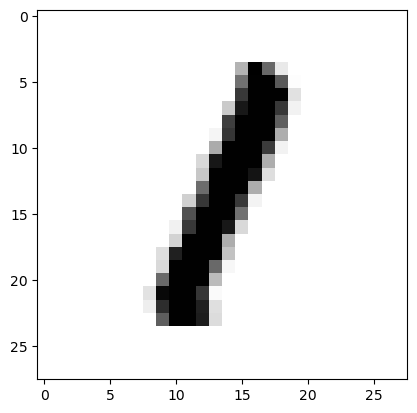

In [42]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

<div dir="rtl">
ما مشاهده می‌کنیم که مدل ما پیش‌بینی صحیحی انجام داده و به درستی رقم 1 را تشخیص داده است. بیایید چند مثال آزمون دیگر و پیش‌بینی‌های مرتبط را چاپ کنیم تا ببینیم که مدل چگونه عمل می‌کند و در کجا اشتباه می‌کند.

C:\Users\Vatche\AppData\Local\Temp\ipykernel_17340\547587288.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


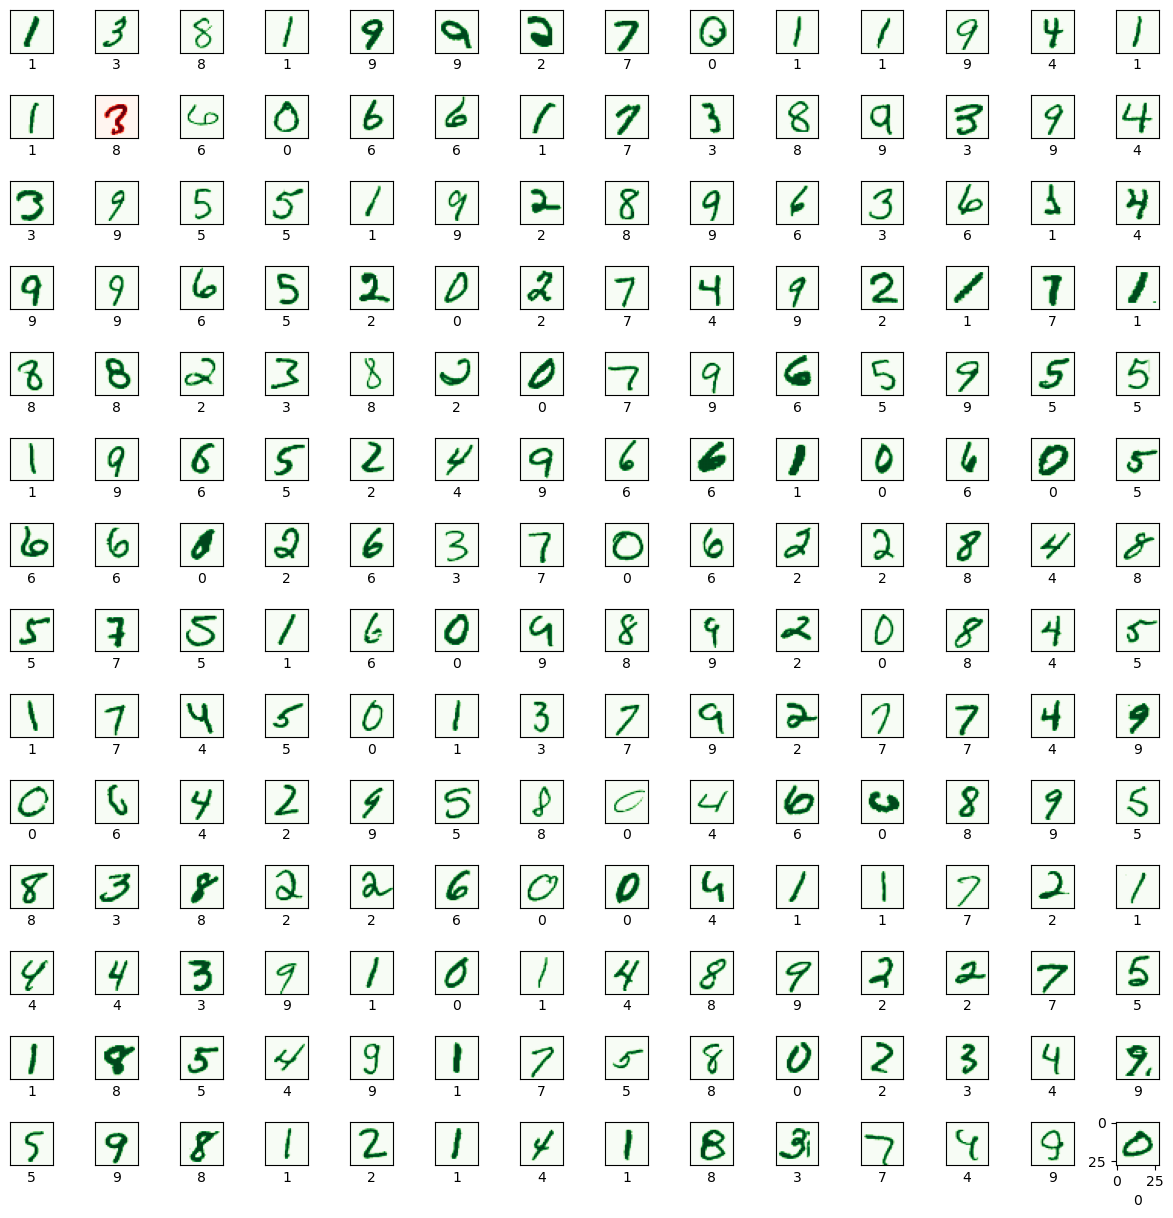

In [43]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

<div dir="rtl">


### 6.3.5 | ماتریس گیجگاهی مجموعه داده اعتبارسنجی <a class = "anchor" id = "cmValidation"></a>


ماتریس گیجگاهی نشان می‌دهد که مدل به خوبی اعداد چه اعدادی را تشخیص می‌دهد و چه اعدادی را معمولاً به درستی تشخیص نمی‌دهد.

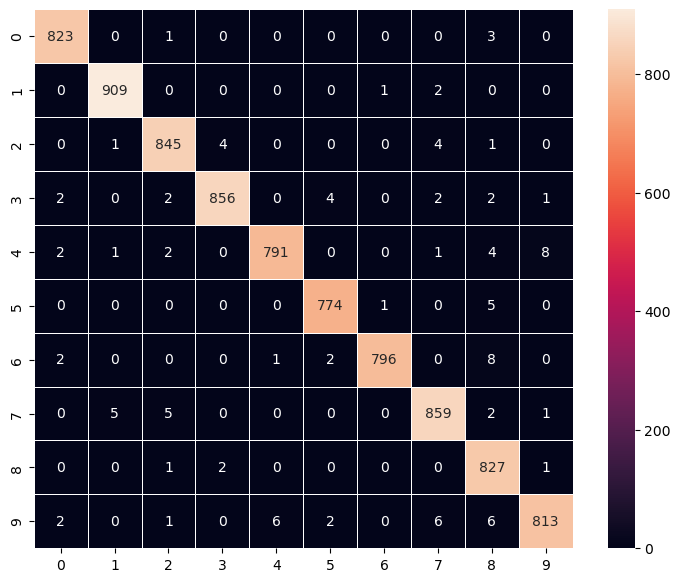

In [44]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<div dir="rtl">


## <span > 7 | پیش‌بینی مدل بر روی مجموعه داده‌های دیده نشده (داده‌های تست) </span><a class="anchor" id="modelprediction"></a>
<hr>

In [45]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 2s 3ms/step
predictions_one_hot: (28000, 10)


<div dir="rtl">


هر پیش‌بینی ده احتمال دارد (یکی برای هر عدد از ۰ تا ۹). ما باید عددی که احتمال بالاتری دارد را انتخاب کنیم.
#### احتمالات پیش‌بینی شده برای تمامی اعداد.

In [46]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.918328e-12,1.194902e-11,9.999999e-01,5.380005e-08,2.972531e-13,3.984696e-16,3.280631e-19,6.563968e-08,1.170942e-10,1.911104e-14
1,9.999932e-01,1.394445e-10,1.840158e-06,3.432050e-10,1.778549e-10,4.153561e-08,2.352200e-08,4.974864e-07,4.063575e-06,2.648891e-07
2,6.548032e-11,6.683392e-09,1.225352e-09,7.224227e-08,8.049745e-06,2.937056e-09,4.133072e-14,2.221970e-07,1.818435e-04,9.998099e-01
3,2.237853e-01,1.696152e-05,6.750360e-04,1.086956e-04,3.512305e-06,9.868722e-07,3.355470e-09,2.433614e-05,1.403119e-02,7.613539e-01
4,1.911770e-14,3.068640e-08,4.191760e-11,9.999998e-01,9.006300e-17,1.125801e-09,1.865661e-14,2.993450e-10,2.591493e-07,8.199756e-12
...,...,...,...,...,...,...,...,...,...,...
27995,1.514256e-16,1.092764e-16,7.721865e-15,9.320550e-11,1.366278e-07,6.688609e-11,8.528112e-22,9.103954e-09,4.848900e-09,9.999999e-01
27996,1.259612e-10,8.524167e-11,6.415118e-10,3.174583e-09,9.545008e-08,4.975372e-09,7.491482e-18,9.999818e-01,8.317339e-11,1.814279e-05
27997,5.914580e-22,3.784014e-12,4.734018e-17,1.000000e+00,1.037472e-20,8.158880e-13,1.175621e-22,1.204340e-12,1.980979e-13,2.696275e-15
27998,8.505270e-15,1.680953e-13,2.692698e-15,5.416217e-12,9.999865e-09,2.742880e-11,1.038027e-18,5.685394e-10,5.379433e-11,1.000000e+00



<div dir="rtl">

### 7.1 | تصویرسازی داده‌های پیش‌بینی شده توسط تست: چگونگی نوشتار اعداد<a class="anchor" id="visualizePredict"></a>


اعداد پیش‌بینی شده با بالاترین احتمالات

<div dir="rtl">


هر پیش‌بینی ده احتمال دارد (یکی برای هر عدد از ۰ تا ۹). ما باید عددی که احتمال بالاتری دارد را انتخاب کنیم.
#### احتمالات پیش‌بینی شده برای تمامی اعداد.

#### عدد واقعی اول از داده‌های آزمون

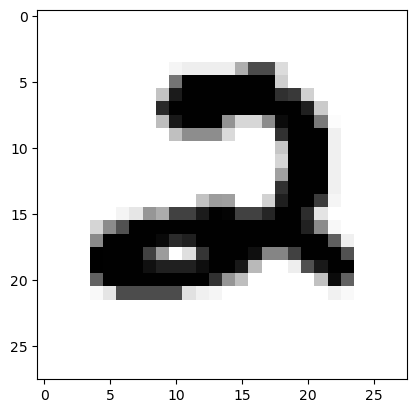

In [47]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [48]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 2s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [49]:
test_pred.to_csv('submission.csv', index = False)